#Boston House Prices Prediction - Linear Regression


In [2]:
#Importing libraries
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [35]:
#Loading dataset
boston = load_boston()
data_df = pd.DataFrame(boston.data, columns=boston.feature_names)
data_df.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 

In [45]:
#Adding target to dataframe
data_df['TARGET'] = boston.target
data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [27]:
#Checking shape of data
data_df.shape

(506, 14)

In [28]:
data_df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  TARGET
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...     ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67    22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08    20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64    23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48    22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     

In [29]:
#Checking for null values within data
data_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

In [30]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


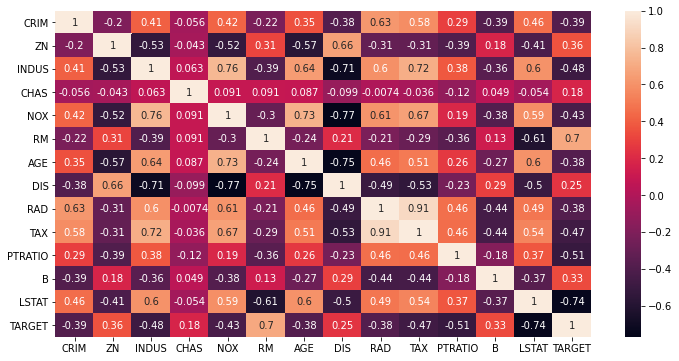

In [32]:
#Correlation between Variables and Target values

import seaborn as sns
import matplotlib.pyplot as plt

corr = data_df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)

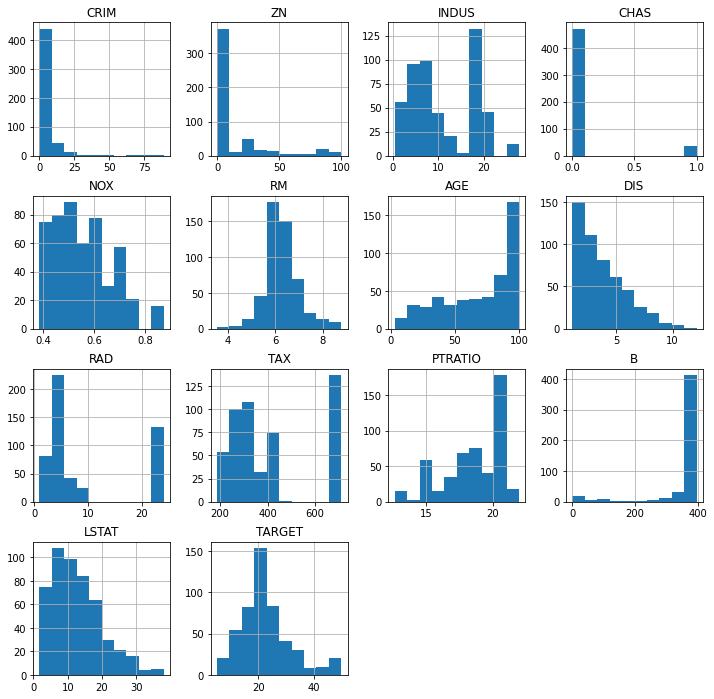

In [34]:
#Data visualization - histograms

data_df.hist(figsize=(12,12));

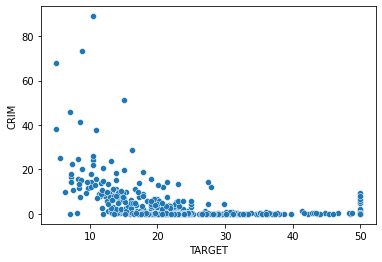

In [53]:
#Scatter plot for Target Price and Crime Rates
sns.scatterplot(x=data_df['TARGET'], y=data_df['CRIM']);

In [6]:
#Creating dataframes from dataset
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)

df_x.head(5), df_y.head(5)

(      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
 0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
 1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
 2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
 3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
 4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
 
 [5 rows x 13 columns],       0
 0  24.0
 1  21.6
 2  34.7
 3  33.4
 4  36.2)

In [12]:
#Initializing Linear Regression Model
model = linear_model.LinearRegression()

In [13]:
#Splitting data to train and test 
trainX, testX, trainY, testY = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [16]:
#Training model
model.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#Print weights or coefficients for each feature [ f(x, a) = mx + da + b = y] where m is the coefficient
print(model.coef_)

[[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


In [20]:
#Printing predictions on first 5 test data
predictions = model.predict(testX)
predictions[:5]

array([[28.99672362],
       [36.02556534],
       [14.81694405],
       [25.03197915],
       [18.76987992]])

In [21]:
testY[:5]

,0
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1


In [23]:
#Checking model performance - Mean Squared Error
error_value = predictions - testY
squared_error = error_value**2

mse = np.mean(squared_error)
mse

0    24.291119
dtype: float64